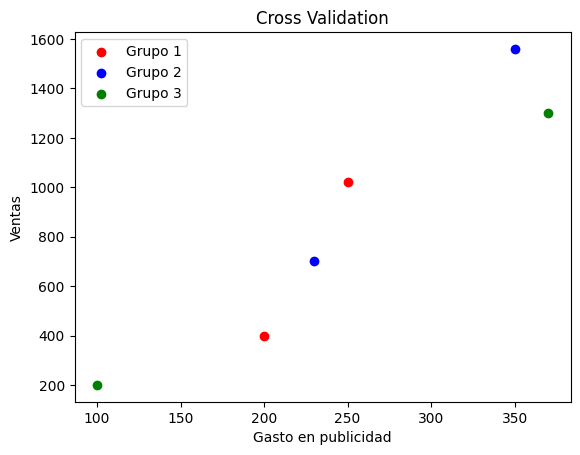

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# Datos de ejemplo (gasto en publicidad y ventas)
data1 = np.array([
    [250, 1020],
    [200, 400]
])

data2 = np.array([
    [230, 700],
    [350, 1560]
])

data3 = np.array([
    [370, 1300],
    [100, 200]
])

data = np.vstack(( data1, data2))

# Graficar los grupos de datos con colores diferentes
plt.scatter(data1[:, 0], data1[:, 1], color='red', label='Grupo 1')
plt.scatter(data2[:, 0], data2[:, 1], color='blue', label='Grupo 2')
plt.scatter(data3[:, 0], data3[:, 1], color='green', label='Grupo 3')

# Ajustar una regresión lineal
linear_regression = LinearRegression()
linear_regression.fit(data[:, 0].reshape(-1, 1), data[:, 1])
linear_predictions = linear_regression.predict(data[:, 0].reshape(-1, 1))

# Ajustar una regresión polinomial de grado 4
polynomial_regression = make_pipeline(PolynomialFeatures(4), LinearRegression())
polynomial_regression.fit(data[:, 0].reshape(-1, 1), data[:, 1])
polynomial_predictions = polynomial_regression.predict(data[:, 0].reshape(-1, 1))

# Graficar las regresiones
#plt.plot(data[:, 0], linear_predictions, color='black', label='Regresión lineal')
#plt.plot(data[:, 0], polynomial_predictions, color='purple', label='Regresión polinomial (grado 4)')

# Configurar el gráfico
plt.xlabel('Gasto en publicidad')
plt.ylabel('Ventas')
plt.legend()
plt.title('Cross Validation')

# Mostrar el gráfico
plt.show()


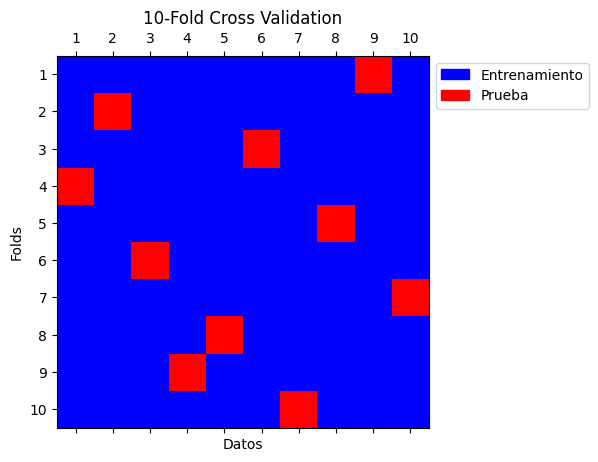

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from matplotlib.colors import ListedColormap, Normalize

# Datos de ejemplo (10 puntos)
X = np.arange(1, 11)

# Configurar la validación cruzada con 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Crear una matriz para representar los folds y su contenido
data_matrix = np.zeros((10, 10))

# Realizar la validación cruzada
for fold, (train_index, test_index) in enumerate(kf.split(X), start=1):
    X_train, X_test = X[train_index], X[test_index]

    # Rellenar la matriz con los valores de entrenamiento y prueba
    data_matrix[fold - 1, train_index] = 1  # Entrenamiento
    data_matrix[fold - 1, test_index] = 2  # Prueba

# Crear un mapa de colores personalizado
cmap = ListedColormap(['white', 'blue', 'red'])

# Crear una normalización personalizada para ajustar el rango de colores
norm = Normalize(vmin=0, vmax=2)

# Graficar la matriz de validación cruzada
plt.matshow(data_matrix, cmap=cmap, aspect='auto', norm=norm)

# Configurar el gráfico
plt.xlabel('Datos')
plt.ylabel('Folds')
plt.xticks(np.arange(0, 10), np.arange(1, 11))
plt.yticks(np.arange(0, 10), np.arange(1, 11))
plt.title('10-Fold Cross Validation')

# Crear leyenda personalizada
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='blue', label='Entrenamiento'),
    mpatches.Patch(color='red', label='Prueba')
]
plt.legend(handles=legend_elements, bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.show()
